# 1. Introduction

Sales prediction involves forecasting the amount of a product that customers will purchase, taking into account various factors such as advertising expenditure, target audience segmentation, and advertising platform selection.
In companies that offer products or services, the role of a Data Scientist is crucial for predicting future sales. By utilizing machine learning techniques in Python, data scientists can analyze and interpret complex datasets, allowing them to make informed decisions regarding advertising costs.
By leveraging these predictions, businesses can optimize their advertising strategies and maximize their sales potential.

This project, developed as Task 3 of my internship with CodSoft, focuses on predicting sales using a simple linear regression model. Throughout this project, we will explore the dataset, visualize key relationships, build a predictive model, and evaluate its performance.

# 2. Data Dictionary

• **TV**: Advertising budget spent on TV (in thousands of dollars).
• **Radio**: Advertising budget spent on Radio (in thousands of dollars).
• **Newspaper**: Advertising budget spent on Newspapers (in thousands of dollars).
• **Sales**: Sales of the product (in thousands of units sold).

# 3. Data Preprocessing

The first step in the data preprocessing stage involves importing the essential Python libraries required for data manipulation, analysis, and visualization. The libraries used include:

**Pandas**: This library is fundamental for data manipulation and analysis. It provides data structures such as DataFrames, which are ideal for handling tabular data. Pandas allows for efficient reading, cleaning, and transformation of datasets.

**NumPy**: NumPy is used for numerical computations. It offers support for large, multi-dimensional arrays and matrices, along with a collection of high-level mathematical functions. It is particularly useful for optimizing performance when performing element-wise operations on arrays.

**Seaborn**: Built on top of Matplotlib, Seaborn is a powerful visualization library that simplifies the creation of informative and attractive statistical graphics. It is used in this project to better understand the distribution of data and relationships between variables, especially in the exploratory data analysis (EDA) stage.

Importing these libraries is a necessary initial step, as they provide the core tools for exploring and preparing the data prior to building machine learning models.

In [1]:
#Importing libraries
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
#Importing Dataset
df= pd.read_csv('advertising.csv')

# 4. Exploratory Data Analysis

Now, we will move on to performing Exploratory Data Analysis (EDA), which helps us better understand the dataset by identifying patterns, trends, and potential issues before building the model.

In [3]:
df.shape

(200, 4)

• The dataset contains 200 rows and 4 columns: TV, Radio, Newspaper, and Sales.

• There are no missing values in any of the columns.

• All features are numerical, which makes them suitable for linear regression modeling.

In [4]:
df. columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [5]:
df.info

<bound method DataFrame.info of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]>

In [6]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


• The average TV advertising spend is approximately 147.04 thousand dollars.

• The average Radio advertising spend is about 23.26 thousand dollars.

• The average Newspaper advertising spend is around 30.55 thousand dollars.

• The average Sales figure is approximately 15.13 thousand units sold.

• The TV spend ranges from 0.7 to 296.4 thousand dollars.

• Sales range from a minimum of 1.6 to a maximum of 27.0 thousand units.

The data appears to be well distributed without extreme outliers in sales, although Newspaper advertising has a maximum value of 114.0, suggesting some possible high investments.

In [7]:
df.head(15)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


## 4.1 Data Cleaning

Next, we will check whether the dataset contains any missing values or duplicated records, as these issues can affect the quality and reliability of our analysis.

In [8]:
# Check for missing values
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [9]:
# Check for duplicate rows
df.duplicated().sum()

0

After checking the dataset, we found:

• No missing values were detected in any of the columns.

• No duplicate rows were found.

The dataset is clean and ready for further analysis and modeling.

## 4.2 Data Visualization

To better understand the relationships between variables, we will create scatter plots. This will help us visualize how Sales are influenced by different advertising channels: TV, Radio, and Newspaper.

In [10]:
import matplotlib.pyplot as plt

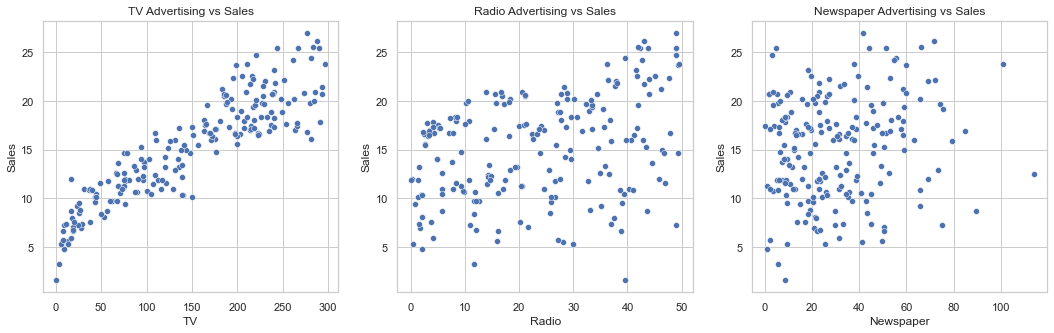

In [11]:
# Set Seaborn style
sns.set(style="whitegrid")

# Create scatter plots
plt.figure(figsize=(18, 5))

# TV vs Sales
plt.subplot(1, 3, 1)
sns.scatterplot(x='TV', y='Sales', data=df)
plt.title('TV Advertising vs Sales')

# Radio vs Sales
plt.subplot(1, 3, 2)
sns.scatterplot(x='Radio', y='Sales', data=df)
plt.title('Radio Advertising vs Sales')

# Newspaper vs Sales
plt.subplot(1, 3, 3)
sns.scatterplot(x='Newspaper', y='Sales', data=df)
plt.title('Newspaper Advertising vs Sales')

plt.show()

The scatter plots reveal the following insights:

• There is a strong positive linear relationship between TV advertising and Sales.

• Radio advertising also shows a positive relationship with Sales, but it is weaker compared to TV.

• Newspaper advertising seems to have little to no clear relationship with Sales.

Given these observations, we will focus on using TV advertising as the independent variable to predict Sales using simple linear regression.

## Heatmap 

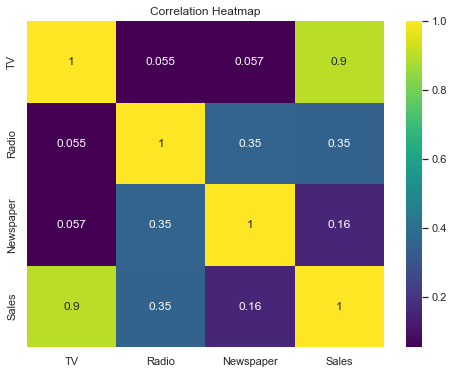

In [12]:
# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()

The correlation heatmap shows the strength of the relationships between all variables in the dataset.
It is evident that TV advertising has the highest positive correlation with Sales.
Radio advertising also shows a moderate positive correlation, whereas Newspaper advertising has a very weak correlation with Sales.

## Features Histograms

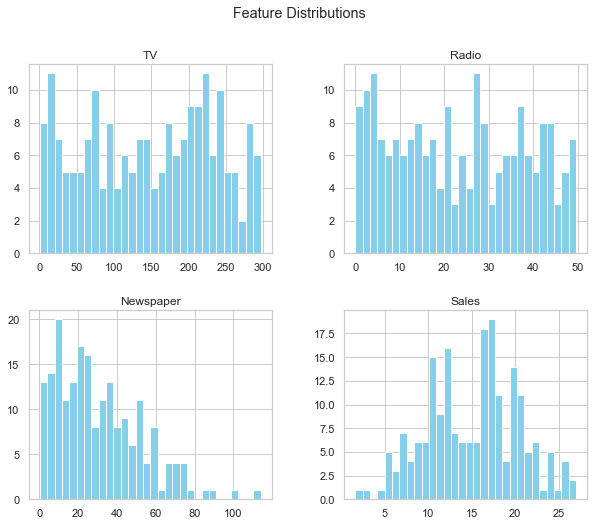

In [13]:
# Histograms
df.hist(bins=30, figsize=(10,8), color='skyblue')
plt.suptitle('Feature Distributions')
plt.show()

The histograms display the distribution of each variable.

• TV and Radio advertising expenditures are relatively spread out over their ranges.

• Newspaper advertising shows a right-skewed distribution, suggesting that higher expenditures are less common.

• Sales are fairly normally distributed, with a slight concentration around the mean value.

## Pair plot of features

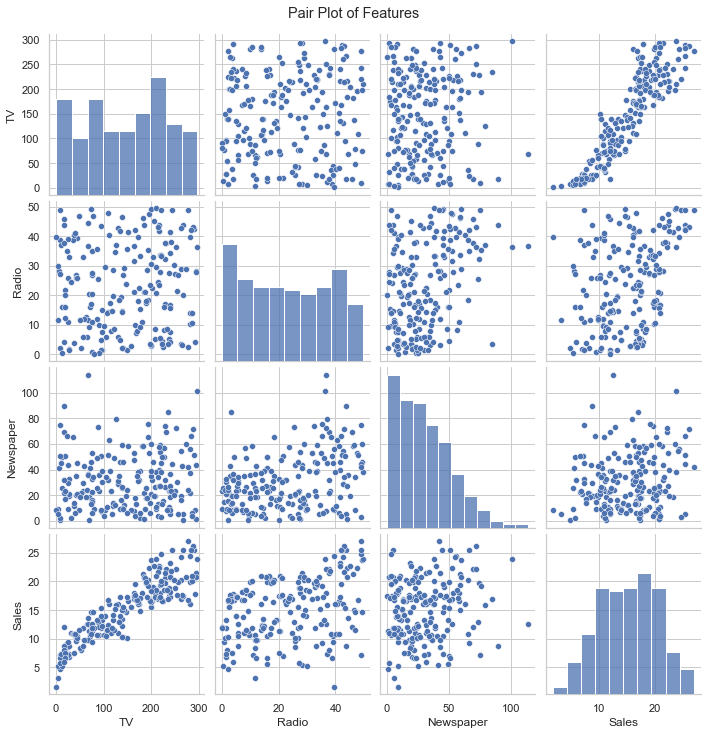

In [14]:
# Pairplot
sns.pairplot(df)
plt.suptitle('Pair Plot of Features', y=1.02)
plt.show()

The pair plot visualizes the pairwise relationships between all variables.
It confirms that TV advertising has a strong linear relationship with Sales, supporting the decision to use TV as the independent variable for the regression model.

# 5. Machine Learning

Next, we move on to the machine learning step. In this step, we select an algorithm, train a model, make predictions, and evaluate the model's performance. Since this project involves simple linear regression (meaning there is only one independent variable: TV), there is no need for complex models. However, it’s important to understand what other options you might have if you wanted to compare or improve your model.

We selected TV advertising as the feature (X) to predict Sales (y). The dataset was split into training and testing sets using an 80/20 ratio, ensuring that the model will be evaluated on unseen data to assess its generalization performance. We used a random seed (random_state=42) to make the split reproducible.

In [15]:
# Import library for splitting the data
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df[['TV']]   # double brackets to keep X as a DataFrame
y = df['Sales']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 6.1  Simple Linear Regression Model

We will now train a Simple Linear Regression model using the LinearRegression() class from Scikit-learn. Then, we will use the trained model to make predictions on the test set.

We implemented a Simple Linear Regression model using the Scikit-learn library. The model was trained on 80% of the dataset and tested on the remaining 20%. After training, we used the model to predict Sales based on TV advertising expenditures in the test set. 

In [16]:
# Import the Linear Regression model
from sklearn.linear_model import LinearRegression

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In this particular case, for regression problems like this one (Simple Linear Regression), we do not use metrics such as accuracy, precision, or recall. These are metrics specifically designed for classification tasks, where the outputs are categories, such as 'fraud' or 'no fraud', 'yes' or 'no'."

In regression, we use metrics such as:
**MAE (Mean Absolute Error)**, **MSE (Mean Squared Error)**, **RMSE (Root Mean Squared Error)** and **R² (R-squared / Coefficient of Determination)**. 

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculating metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Absolute Error (MAE): 1.95
Mean Squared Error (MSE): 6.10
Root Mean Squared Error (RMSE): 2.47
R-squared (R²): 0.80


The model achieved an R-squared value of 0.80, indicating that 80% of the variability in Sales can be explained by the TV advertising expenditure.
Additionally, the low values of MAE (1.95) and RMSE (2.47) demonstrate that the model's predictions are quite close to the actual sales figures, confirming that the linear relationship between TV and Sales is strong and reliable.

## Plotting Prediction vs. Actual Sales 

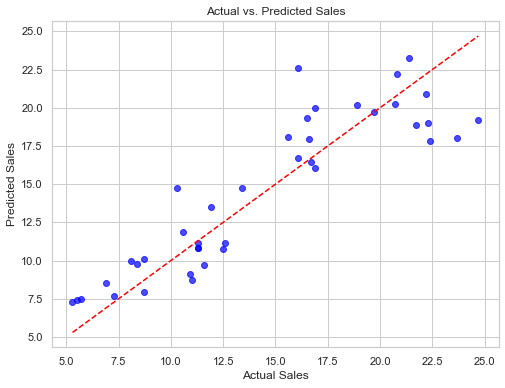

In [18]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')
plt.grid(True)
plt.show()


The scatter plot above compares the actual sales (from the test set) with the sales predicted by our linear regression model. The red dashed line represents a perfect prediction line (where predicted = actual).
As shown, the majority of points lie close to this line, confirming that the model performs well and makes reliable predictions based on TV advertising expenditure.

# Conclusions

•The dataset included 200 observations with four columns: TV, Radio, Newspaper, and Sales. These represented advertising budget allocations and the resulting product sales.

• We confirmed that:

    - There were no missing values in the dataset.

    - There were no duplicate entries. This ensured the dataset was clean and ready for modeling without any preprocessing issues.
    
• Through scatter plots and correlation heatmaps, we concluded that:

    - There is a strong positive linear relationship between TV advertising and Sales.

    - The correlation between Radio or Newspaper and Sales was weaker, supporting the focus on TV as the sole predictor in this simple regression.
    
• We trained a Simple Linear Regression model using TV as the independent variable. The model was fit on 80% of the dataset, with the remaining 20% used for testing. This split ensured fair performance evaluation.

• The model performs well and is reliable for predicting sales based on TV advertising spending alone. An R² of 0.80 shows that 80% of the variability in sales is explained by TV ads.

• A scatter plot comparing actual and predicted sales showed that most predictions were close to the true values, reinforcing the model's accuracy and confirming the linear pattern observed during EDA.

• This project demonstrated the entire pipeline of a machine learning regression task from data exploration and cleaning to model training, evaluation, and interpretation. The strong performance of the model suggests that TV advertising is a key driver of product sales, and such models can assist businesses in making smarter marketing investments.